# Word Embedding

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA # Principle Component Analysis Dimensions Reduction

from gensim.models import Word2Vec , FastText
from gensim.utils import simple_preprocess

<b>Örnek Veri Seti Oluşturma</b>

In [2]:
sentences = [
        "Kedi çok tatlı bir hayvandır.",
        "Kediler evcil hayvanlardır.",
        "Kediler genellikle bağımsız hareket etmeyi sever.",
        "Kediler sadık ve dost canlısı hayvanlardır.",
        "Hayvanlar insanlar için iyi arkadaşlardır."
    ]

In [3]:
tokenized_sentences = [simple_preprocess(sentence) for sentence in sentences]

<b>Word2vec</b>

In [5]:
word2_vec_model = Word2Vec(sentences = tokenized_sentences , vector_size = 50 , window = 5 , min_count = 1 , sg = 0)

<b>Fasttext</b>

In [6]:
fasttext_model = FastText(sentences = tokenized_sentences , vector_size = 50 , window = 5 , min_count = 1 , sg = 0)

<i>Görselleştirme</i>

In [9]:
def plot_word_embedding(model,title):
    word_vectors = model.wv

    words = list(word_vectors.index_to_key)[:1000]
    vectors = [word_vectors[word] for word in words]

    # PCA
    pca = PCA(n_components = 3)
    reduced_vectors = pca.fit_transform(vectors)

    # 3D Görselleştirme
    fig = plt.figure(figsize = (8,6))
    ax = fig.add_subplot(111 , projection = "3d")

    # Vektörleri çiz
    ax.scatter(reduced_vectors[:,0] , reduced_vectors[:,1] , reduced_vectors[:,2])

    # Kelimeleri Etiketle 
    for i , word in enumerate(words):
        ax.text(reduced_vectors[i,0],reduced_vectors[i,1],reduced_vectors[i,2],word,fontsize = 10)
    ax.set_title(title)
    ax.set_xlabel("Component 1")
    ax.set_ylabel("Component 2")
    ax.set_zlabel("Component 3")
    plt.show()

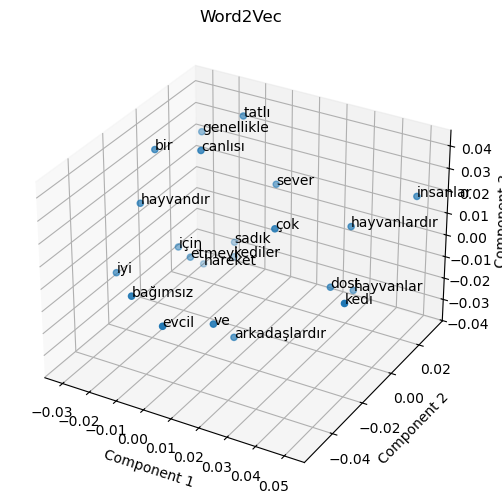

In [10]:
plot_word_embedding(word2_vec_model,"Word2Vec")

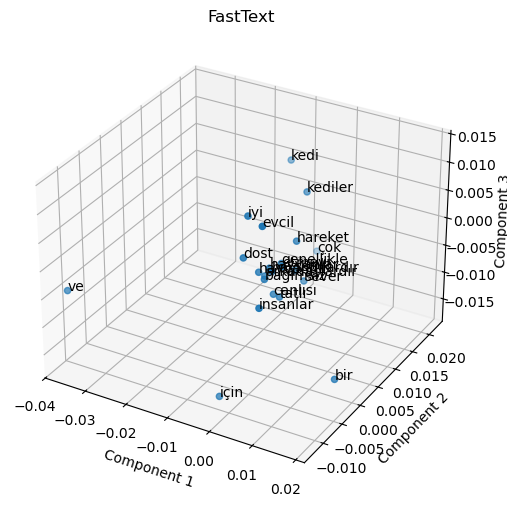

In [11]:
plot_word_embedding(fasttext_model,"FastText")